Dieses Skript hat das Tutorial von der cbs Webiste erweitert, um eigene Daten darzustellen


In [1]:
import pandas as pd # type: ignore
import geopandas as gpd # type: ignore
import cbsodata # type: ignore

In [2]:
# Find out which columns are available
#TableID    , ColumnID
# 37201	    , LevendGeborenKinderenRelatief_2
# 3747	    , MannenEnVrouwen_4
# 37201 	, JongerDan20Jaar_9
# 37201	    , k_40Tot45Jaar_14 & k_45JaarOfOuder_15
# 71487NED	, TotaalHuishoudensMetKinderen_1
# 85701NED	, A025294 & A025297
# 85701NED	, A025294
# 37259NED	, BevolkingOp1Januari_1
# 37259NED	, Bevolkingsdichtheid_2
# 85826NED	, WerkzameBeroepsbevolking_3
# 85826NED	, Beroepsbevolking_2
# 85826NED	, WerklozeBeroepsbevolking_12
metadata = pd.DataFrame(cbsodata.get_meta('85826NED', 'TypedDataSet'))

In [3]:
metadata

,ID,Persoonskenmerken,RegioS,Perioden,BeroepsEnNietBeroepsbevolking_1,Beroepsbevolking_2,WerkzameBeroepsbevolking_3,Werknemer_4,Zelfstandige_5,PositieInDeWerkkringOnbekend_6,Beroepsniveau1_7,Beroepsniveau2_8,Beroepsniveau3_9,Beroepsniveau4_10,BeroepsniveauOnbekend_11,WerklozeBeroepsbevolking_12,Werkloosheidspercentage_13,NietBeroepsbevolking_14,BrutoArbeidsparticipatie_15,NettoArbeidsparticipatie_16
0,0,T009002,NL01,2013JJ00,12638.0,9187.0,8433.0,7199.0,1234.0,0.0,792.0,3702.0,1394.0,2409.0,136.0,754.0,8.2,3451.0,72.7,66.7
1,1,T009002,NL01,2014JJ00,12665.0,9145.0,8382.0,7132.0,1251.0,0.0,805.0,3686.0,1343.0,2436.0,112.0,762.0,8.3,3520.0,72.2,66.2
2,2,T009002,NL01,2015JJ00,12685.0,9182.0,8458.0,7191.0,1267.0,0.0,794.0,3745.0,1333.0,2490.0,95.0,724.0,7.9,3503.0,72.4,66.7
3,3,T009002,NL01,2016JJ00,12768.0,9215.0,8570.0,7270.0,1300.0,0.0,798.0,3754.0,1383.0,2537.0,98.0,646.0,7.0,3553.0,72.2,67.1
4,4,T009002,NL01,2017JJ00,12870.0,9290.0,8744.0,7422.0,1322.0,0.0,820.0,3806.0,1413.0,2561.0,144.0,546.0,5.9,3580.0,72.2,67.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47845,47845,2018820,AM99,2019JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47846,47846,2018820,AM99,2020JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47847,47847,2018820,AM99,2021JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47848,47848,2018820,AM99,2022JJ00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
metadata = metadata[['RegioS','Perioden','Beroepsbevolking_2']]

In [5]:
metadata

,RegioS,Perioden,Beroepsbevolking_2
0,NL01,2013JJ00,9187.0
1,NL01,2014JJ00,9145.0
2,NL01,2015JJ00,9182.0
3,NL01,2016JJ00,9215.0
4,NL01,2017JJ00,9290.0
...,...,...,...
47845,AM99,2019JJ00,NaN
47846,AM99,2020JJ00,NaN
47847,AM99,2021JJ00,NaN
47848,AM99,2022JJ00,NaN


In [9]:
# Zeitraum beschränken
data = metadata[metadata['Perioden'] == '2020JJ00']

data

,RegioS,Perioden,Beroepsbevolking_2
7,NL01,2020JJ00,9581.0
18,LD01,2020JJ00,925.0
29,LD02,2020JJ00,2024.0
40,LD03,2020JJ00,4598.0
51,LD04,2020JJ00,2033.0
...,...,...,...
47802,AM35,2020JJ00,1.0
47813,AM36,2020JJ00,5.0
47824,AM37,2020JJ00,2.0
47835,AM38,2020JJ00,2.0


In [11]:
#GeoDaten Abfragen
municipal_boundaries = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")

municipal_boundaries['rubriek'].unique()

municipal_boundaries

,id,statcode,jrstatcode,statnaam,rubriek,geometry
0,1,GM0014,2021GM0014,Groningen,gemeente,"MULTIPOLYGON (((245194.691 592594.007, 245344...."
1,2,GM0034,2021GM0034,Almere,gemeente,"MULTIPOLYGON (((146891.056 493291.709, 147422...."
2,3,GM0037,2021GM0037,Stadskanaal,gemeente,"MULTIPOLYGON (((263763.866 566430.392, 263988...."
3,4,GM0047,2021GM0047,Veendam,gemeente,"MULTIPOLYGON (((256231.909 572319.213, 258595...."
4,5,GM0050,2021GM0050,Zeewolde,gemeente,"MULTIPOLYGON (((170596.293 486786.456, 170560...."
...,...,...,...,...,...,...
347,348,GM1966,2021GM1966,Het Hogeland,gemeente,"MULTIPOLYGON (((215071.742 595253.084, 215169...."
348,349,GM1969,2021GM1969,Westerkwartier,gemeente,"MULTIPOLYGON (((217623.770 592502.490, 217917...."
349,350,GM1970,2021GM1970,Noardeast-Fryslân,gemeente,"MULTIPOLYGON (((207686.537 595425.623, 207640...."
350,351,GM1978,2021GM1978,Molenlanden,gemeente,"MULTIPOLYGON (((123712.581 439998.364, 124188...."


Text(0.5, 1.0, 'Quantiles, 2020')

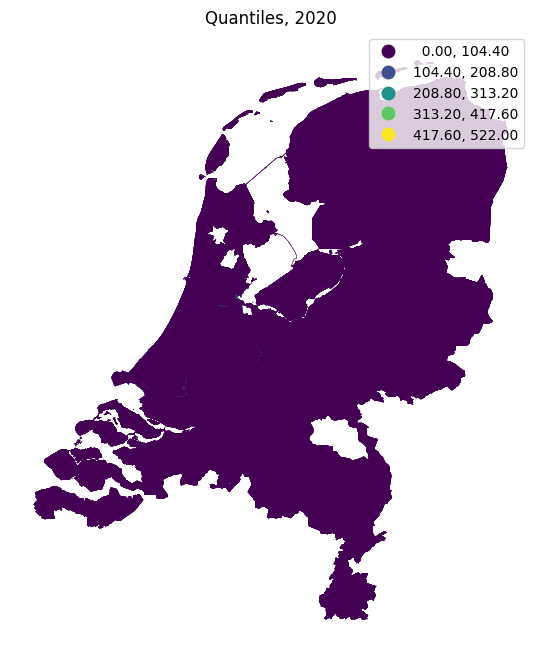

In [12]:

# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, data,
                               left_on = "statcode", 
                               right_on = "RegioS")
# Create a thematic map
# schemes:
# Natural_Breaks, Equal_Interval, Quantiles, Standard_Deviation
#
# boxplot, equalinterval, fisherjenks, fisherjenkssampled, headtailbreaks, jenkscaspall, 
# jenkscaspallforced, jenkscaspallsampled, maxp, maximumbreaks, naturalbreaks, quantiles, 
# percentiles, prettybreaks, stdmean, userdefined
#
# K = number of classes (if no scheme, default on 5)
p = municipal_boundaries.plot(column='Beroepsbevolking_2',
                             scheme="Equal_Interval",
                             k=5,
                             legend = True, 
                             figsize = (10,8))
p.axis('off')
p.set_title('Quantiles, 2020')
